## Environment setup
This cell sets up the Julia environment required to run the simulation.

It activates the project environment defined in Project.toml and Manifest.toml.
It loads all necessary packages used for modeling, data manipulation, clustering, plotting, and agent-based simulation.
It includes the source files (agents.jl, functions.jl, model.jl) that define the agent types, helper functions, and the main simulation logic.

In [1]:
import Pkg

Pkg.activate(".")

using Agents
using Random
using ColorTypes
using StatsBase
using CairoMakie

include("agents.jl")
include("model.jl")
include("functions.jl")


  Activating project at `c:\Users\flavi\OneDrive\Desktop\materiale didattico\physics of complex systems\Tesi\Codici\Clone_GitHubGentrification\Schelling`


unhappy_counter (generic function with 1 method)

## Model Initialization

The environment of the model consists of a **40x40 grid**, populated by two **equally sized groups** of agents (represented by red and blue dots) randomly distributed across the grid. 

The model is governed by two main parameters:
* **Vacancy fraction**: the percentage of the grid not occupied by agents.
* **Tolerance threshold ($\tau$)**: the individual preference for similar neighbors (further detailed in the Dynamics section).

The cell below visualizes the **initial state** of the model with a vacancy fraction set to **2%**.

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\flavi\.julia\packages\Makie\8h0bl\src\scenes.jl:227


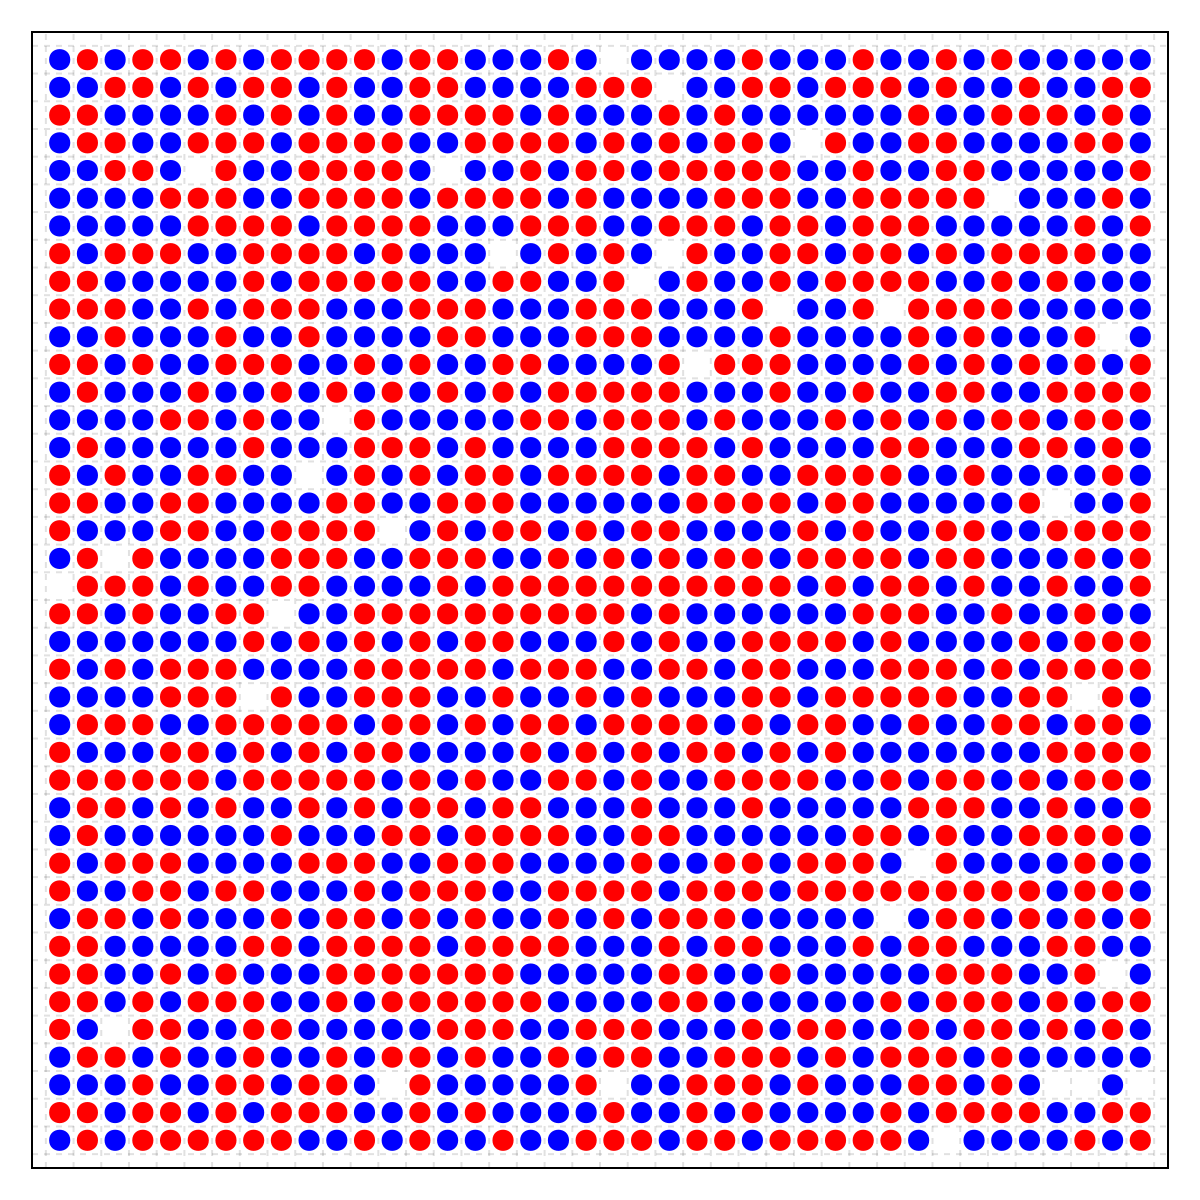

In [3]:
tol = 0.65
frac = 0.02

initial_model = initialize_model( dims = (40,40), tolerance = tol, vacancy_frac = frac)

plot_model(initial_model)



## Dynamics

At each time step, agents calculate the fraction $f$ of neighbors belonging to the **opposite group** and compare it with their tolerance threshold $f^*$. The utility function $U$ is defined as follows:

$$
U = 
\begin{cases} 
1 & \text{if } f \leq f^* \\
0 & \text{if } f > f^*
\end{cases}
$$

In this model, $U=1$ signifies the agent is "satisfied," while $U=0$ indicates the agent is "unsatisfied." Specifically, an agent remains satisfied as long as the proportion of unlike neighbors does not exceed the threshold. 

Unsatisfied agents search for vacant cells where their utility would become 1; if such a location is found, they move there. The simulation concludes when the system reaches a steady state where all agents are satisfied (given our parameters, this convergence occurs rapidly).

The cell below compares the initial random distribution with the final state. Even with a tolerance threshold as high as **65%**—indicating that agents are individually quite tolerant—clear **segregation domains** emerge through the collective dynamics.


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\flavi\.julia\packages\Makie\8h0bl\src\scenes.jl:227


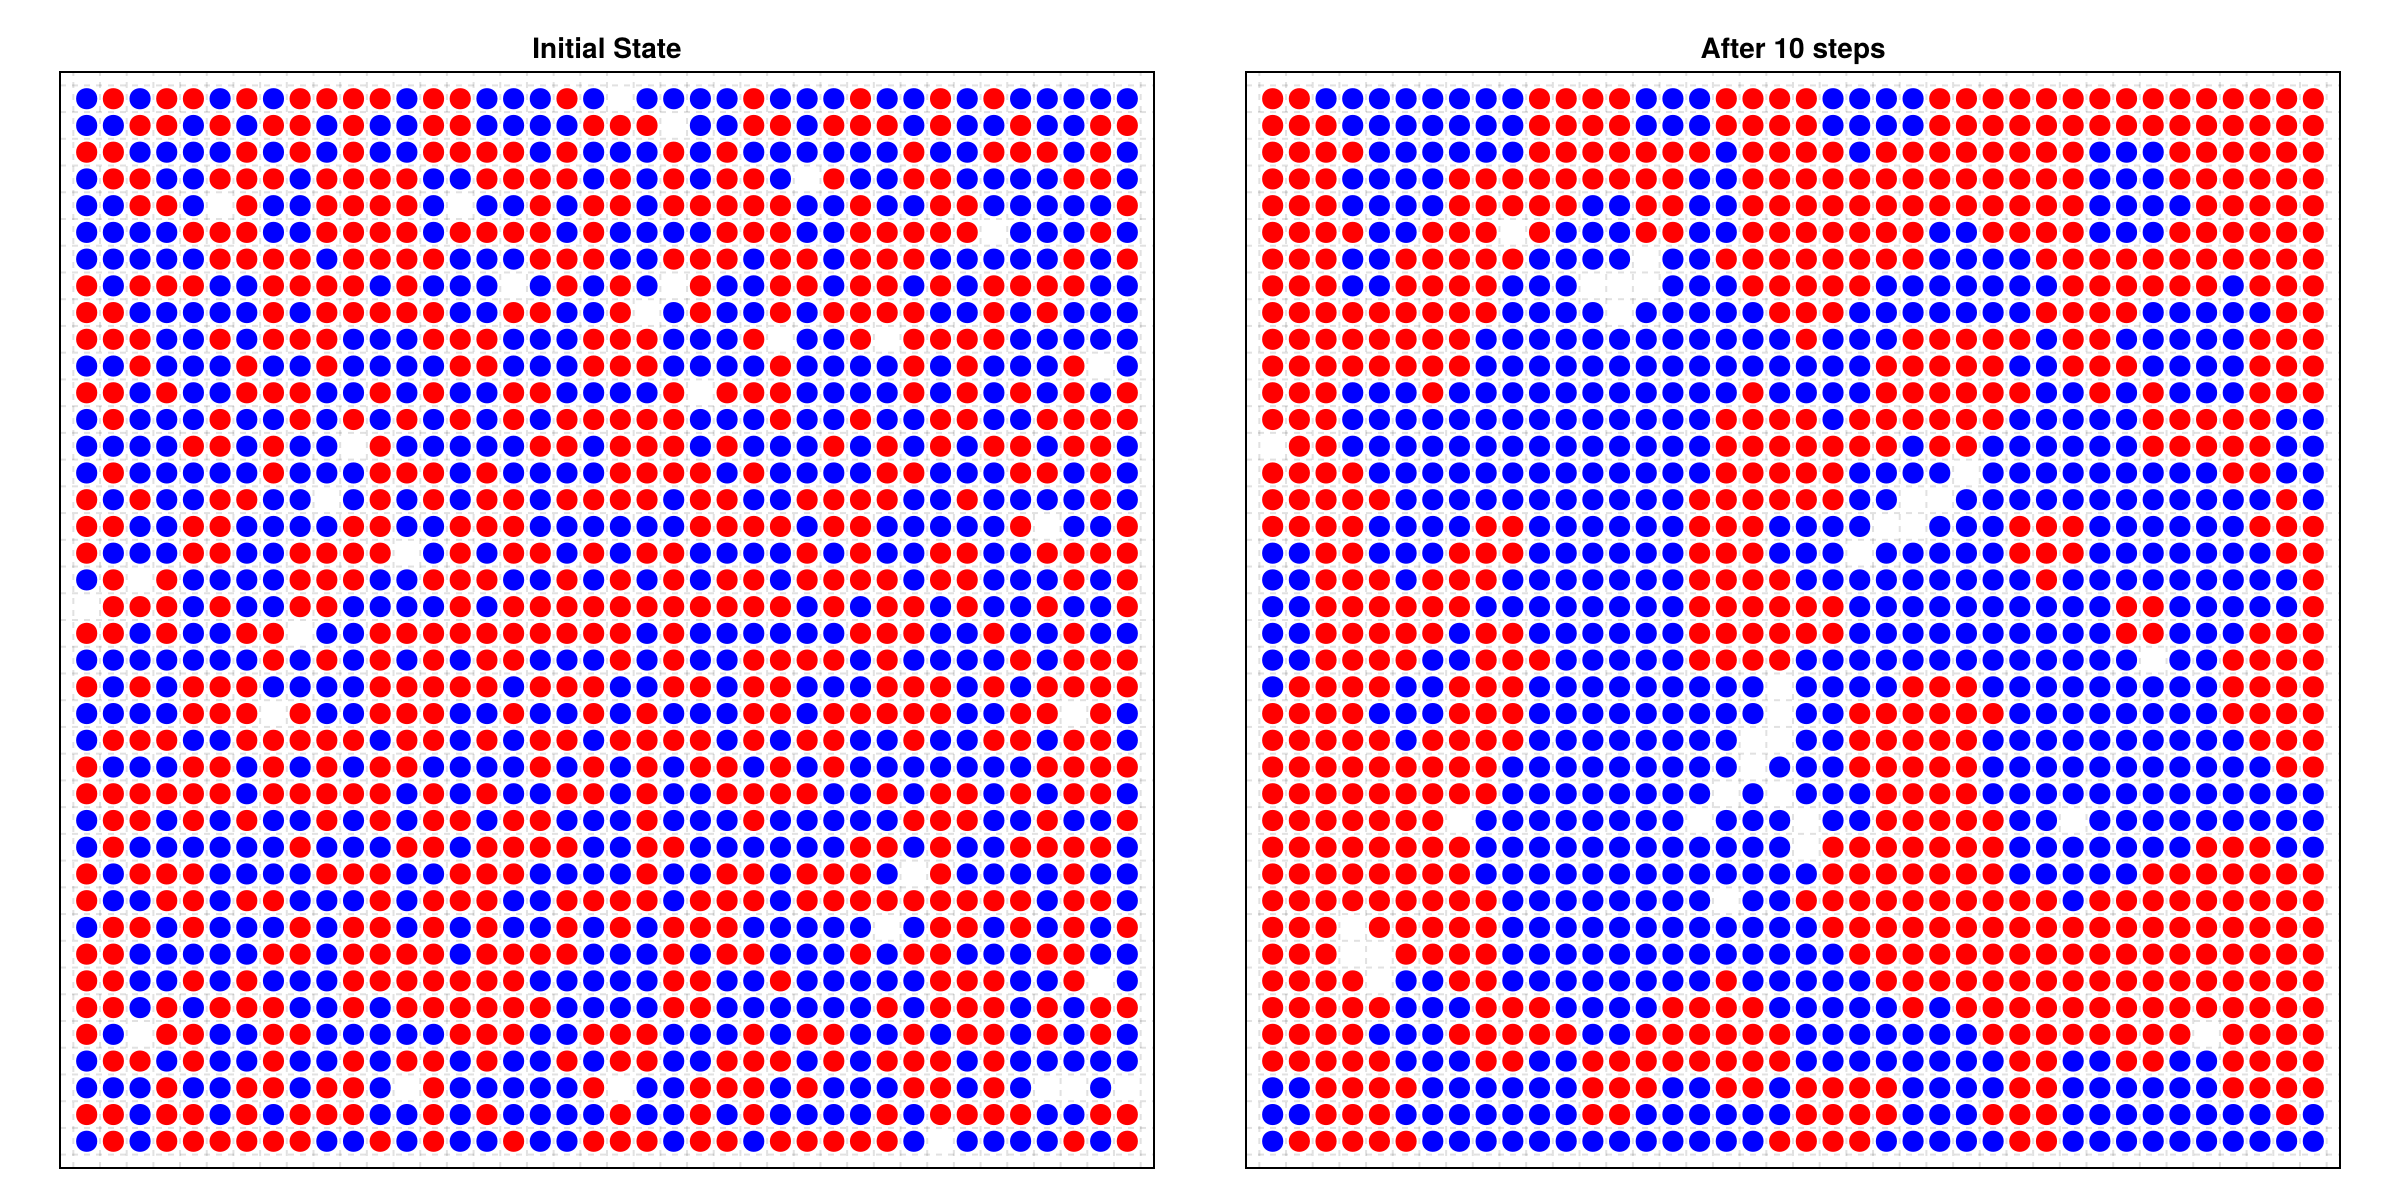

In [5]:

tol = 0.65
frac = 0.02
N_STEPS_REL = 10

initial_model = initialize_model(dims=(40,40), tolerance=tol, vacancy_frac=frac, seed=123)

model_rel = initialize_model(dims=(40,40), tolerance=tol, vacancy_frac=frac, seed=456)
step!(model_rel, agent_step_relative!, model_step!, N_STEPS_REL)


fig = Figure(resolution = (1200, 600))

ax1 = Axis(fig[1, 1], title="Initial State") 
ax2 = Axis(fig[1, 2], title="After $(N_STEPS_REL) steps") 

plot_model!(ax1, initial_model, legend_on=true) 
plot_model!(ax2, model_rel, legend_on=true)


fig


## Segregation Measure

To address segregation more quantitatively, we can monitor the evolution of the fraction of **same-color neighbor links**. 

As shown below, this value grows from approximately **50%** to over **75%** in just a few steps. This indicates that the contact between the two groups has roughly halved during the dynamics, confirming the emergence of strong macroscopic clusters.

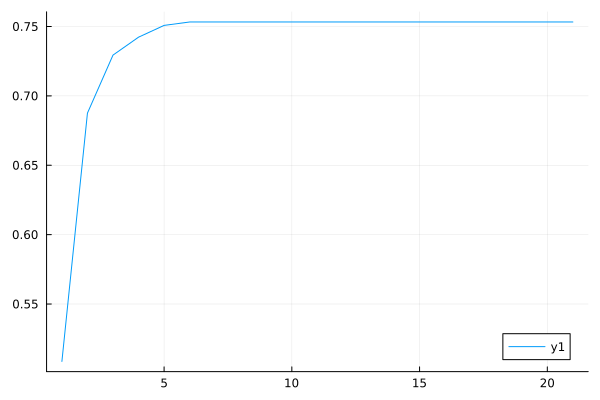

In [ ]:

model = initialize_model()
same_neig_frac = []
push!(same_neig_frac, 1-model.interface_fraction)

for step in 1:20

    step!(model, agent_step_relative!, model_step!,1)
    push!(same_neig_frac, 1-model.interface_fraction)
end
using Plots
Plots.plot(same_neig_frac)
